<a href="https://colab.research.google.com/github/FlorDGM13/Ejercico_Analisis_Exploratorio_1/blob/main/Ejercicio_An%C3%A1lisis_Exploratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS EXPLORATORIO: Clientes seguros

Este analisis tiene como objetivo explorar comprender las caracteristicas basicas de una cartera de clientes de seguros.
El dataset contiene informaciòn sobre el cliente, incluyendo edad, genero, tipo de seguro contratado, prima anual, estado de residencia y fecha de contrataciòn


A trávez de este analisis,buscamos:

- Identificar la distribucion de clientes por tipo de seguro y ubicaciòn geofráfica

- Analizar patrones de primas pagadas y diferencias segun tipo de seguro y genero

- Observar tendencias temporales en la contratación de sguros.

- Generar insights que puedan apoyar decisiones estrategicas en la gestion comercial y de riesgos

In [ ]:
import pandas as pd

In [ ]:
#Leer dataset

df = pd.read_csv('clientes_seguro.csv', parse_dates=['fecha_contratacion'])
df

,id_cliente,edad,genero,tipo_seguro,prima_anual,estado,fecha_contratacion
0,101,45,M,Vida,4800,CDMX,2022-05-01
1,102,34,F,Auto,3200,EdoMex,2023-03-15
2,103,29,F,Vida,5100,Jalisco,2021-11-22
3,104,58,M,Gastos Médicos,8800,CDMX,2020-07-10
4,105,41,F,Auto,3400,Jalisco,2023-01-05
5,106,36,M,Vida,4700,EdoMex,2022-08-19
6,107,50,M,Gastos Médicos,9100,Nuevo León,2019-04-30
7,108,27,F,Vida,5000,CDMX,2021-09-12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_cliente          8 non-null      int64 
 1   edad                8 non-null      int64 
 2   genero              8 non-null      object
 3   tipo_seguro         8 non-null      object
 4   prima_anual         8 non-null      int64 
 5   estado              8 non-null      object
 6   fecha_contratacion  8 non-null      object
dtypes: int64(3), object(4)
memory usage: 580.0+ bytes


* Q1: ¿Cuantos clientes hay por tipo de seguro?

In [ ]:
tipo_seguros = df['tipo_seguro'].value_counts()
tipo_seguros

,count
tipo_seguro,
Vida,4
Auto,2
Gastos Médicos,2


* Q2: ¿Cual es el promedio de prima por tipo de seguro?

In [ ]:
avg_prima = df.groupby('tipo_seguro')['prima_anual'].mean()
avg_prima

,prima_anual
tipo_seguro,
Auto,3300.0
Gastos Médicos,8950.0
Vida,4900.0


* Q3: ¿Cual es la edad promedio por genero?

In [ ]:
edad_prom = df.groupby('genero')['edad'].mean()
edad_prom

,edad
genero,
F,32.75
M,47.25


* Q4: ¿Cuantos contratos se realizan por año?

In [ ]:
df['año'] = df['fecha_contratacion'].dt.year
df['año'].value_counts().sort_index()

,count
año,
2019,1
2020,1
2021,2
2022,2
2023,2


* Q5:¿Que estado tiene la mayor cantidad de clientes?

In [ ]:
clientes_por_estado = df.groupby('estado')['id_cliente'].count()
clientes_por_estado

,id_cliente
estado,
CDMX,3
EdoMex,2
Jalisco,2
Nuevo León,1


* Q6:¿Numero de clientes por etsado?

In [ ]:
numclientes_estado = df.groupby('estado')['id_cliente'].nunique()
numclientes_estado

,id_cliente
estado,
CDMX,3
EdoMex,2
Jalisco,2
Nuevo León,1


* VISUALIZACION

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

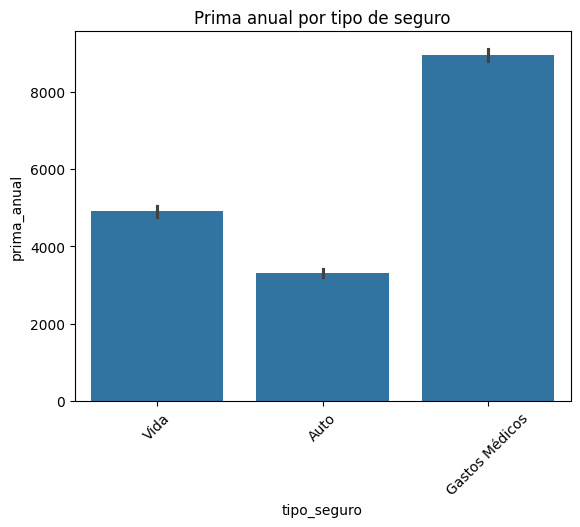

In [ ]:
sns.barplot(data=df, x='tipo_seguro', y='prima_anual')
plt.title('Prima anual por tipo de seguro')
plt.xticks(rotation=45)
plt.show()

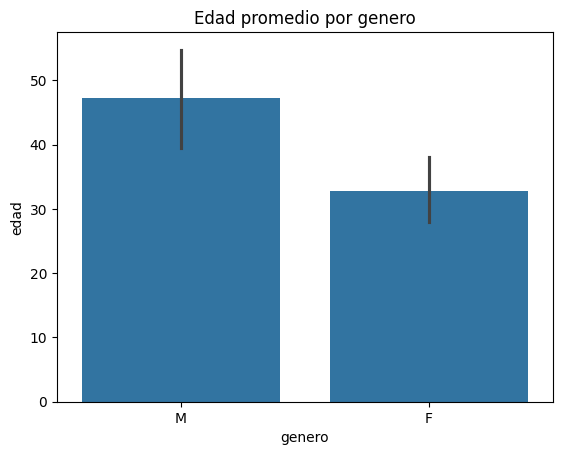

In [ ]:
sns.barplot(data=df, x='genero', y='edad')
plt.title('Edad promedio por genero')
plt.show()

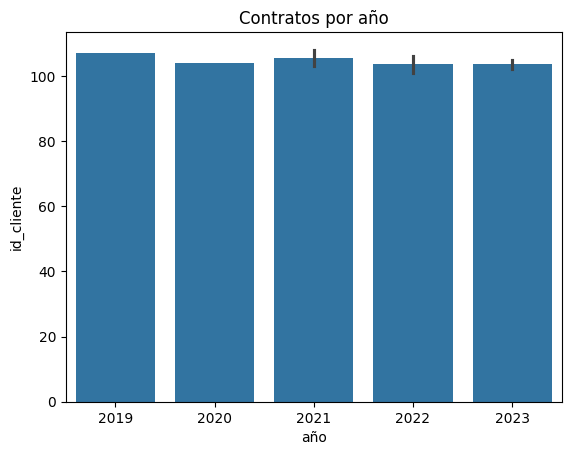

In [ ]:
sns.barplot(data=df, x='año', y='id_cliente')
plt.title('Contratos por año')
plt.show()

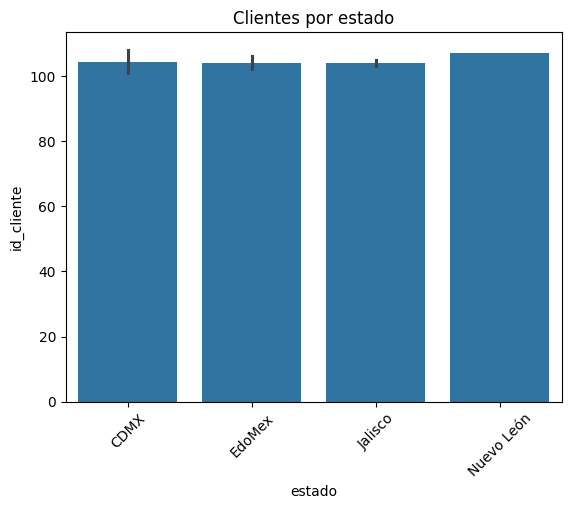

In [ ]:
sns.barplot(data=df, x='estado', y='id_cliente')
plt.title('Clientes por estado')
plt.xticks(rotation=45)
plt.show()

* Insights

1) Encontramos que el tipo de seguro mas comun es "GASTOS MEDICOS", con un promedio de prima de  aproximadamente 8950

2)La mayoria de los clientes estan en CDMX , seguido por EDOMEX y JALISCO

3) La edad promedio varia por genero: las mujeres tienen una media de 32.75 y los hombres de 47.25

4) Los años con mas contrataciones fue de 2021 a 2023